# Homework 1: Exploration & Exploitation Aitthikit Kitcharoennon 65340500062

## Class define

In [68]:
# !pip install numpy

In [69]:
# !pip install matplotlib

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class Multi_Armed_Bandit:
    def __init__(self, n: int, mean_range=(-1, 1), std_dev=1.0 , mode = 0):
        self.n = n
        self.means = np.random.uniform(mean_range[0], mean_range[1], n)  # Hidden reward means
        self.std_dev = std_dev  # Fixed standard deviation
        self.fix = [-0.50771065, -0.78082101,  0.59902529,  0.67058601,  0.82758957,  0.49655859, 0.63167973,  0.80476759,  0.41086208, -0.83697453]
        self.mode = mode
    
    def pull(self, arm: int) -> float:
        if self.mode == 1:
            if 0 <= arm < self.n:
                return np.random.normal(self.means[arm], self.std_dev)
            else:
                raise ValueError("Invalid bandit arm index.")
        else:
            if 0 <= arm < self.n:
                return np.random.normal(self.fix[arm], self.std_dev)
            else:
                raise ValueError("Invalid bandit arm index.")
            
    def best_arm(self) -> int:
        if self.mode == 1:
            return np.argmax(self.means)
        else:
            return np.argmax(self.fix)
    
    def get_means(self):
        if self.mode == 1:
            return self.means
        else:
            return self.fix
    
class Agent_greedy:
    def __init__(self, n: int, epsilon=0.1):
        self.n = n
        self.epsilon = epsilon
        self.values = np.zeros(n)  
        self.action_counts = np.zeros(n) 
    
    def select_action(self) -> int:
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n)
        else:
            return np.argmax(self.values)
    
    def update(self, action: int, reward: float):
        self.action_counts[action] += 1
        n = self.action_counts[action]
        value = self.values[action]
        self.values[action] = ((n - 1) / n) * value + (1 / n) * reward
        
    def get_value(self):
        return np.argmax(self.values)
    
    def reset(self):
        self.values = np.zeros(self.n) 
        self.action_counts = np.zeros(self.n)  

class Agent_UCB:
    def __init__(self, n: int, c = 0.7):
        self.n = n
        self.c = c
        self.values = np.zeros(n) 
        self.action_counts = np.zeros(n) 
        self.total_count = 0
    
    def select_action(self) -> int:
        UCB_value = self.values + self.c * np.sqrt(np.log(self.total_count + 1) / (self.action_counts + 1e-5)) # 1e-5 for not zero division
        return np.argmax(UCB_value)
    
    def update(self, action: int, reward: float):
        self.action_counts[action] += 1
        self.total_count += 1
        n = self.action_counts[action]
        value = self.values[action]
        self.values[action] = ((n - 1) / n) * value + (1 / n) * reward
        
    def get_value(self):
        return np.argmax(self.values)
    
    def reset(self):
        self.values = np.zeros(self.n) 
        self.action_counts = np.zeros(self.n) 
        self.total_count = 0


In [71]:
bandit_amount = 5
epsilon = [0.1,0.01,1.0]
n_time = 100000
c_value = [0.7,0.2,1.0]
Set1 = Multi_Armed_Bandit(bandit_amount,mode = 1)
greedy_Agent = Agent_greedy(bandit_amount)
UCB_Agent = Agent_UCB(bandit_amount)

print(Set1.get_means())

[ 0.56214577 -0.6209835   0.41116582 -0.89353099 -0.65442313]


In [72]:
total_reward = []
bandit_rewards = np.zeros((bandit_amount, n_time))
data = np.empty(n_time)
data_action = np.empty(n_time)
cumulative_avg = []
cumulative_reward_avg = []

In [73]:
for i in range(len(epsilon)):
    greedy_Agent.epsilon = epsilon[i]
    print(epsilon[i])
    for t in range(n_time):
        action = greedy_Agent.select_action()
        reward = Set1.pull(action)
        greedy_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    greedy_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.1
0.01
1.0


In [74]:
for i in range(len(c_value)):
    UCB_Agent.c = c_value[i]
    print(c_value[i])
    for t in range(n_time):
        action = UCB_Agent.select_action()
        reward = Set1.pull(action)
        UCB_Agent.update(action,reward)
        # total_reward[action] += reward
        bandit_rewards[action, t] = reward
        data[t] = reward
        data_action[t] = action
    total_reward.append(bandit_rewards)
    cumulative_avg.append(np.cumsum(data_action)/ (np.arange(n_time) + 1))
    cumulative_reward_avg.append(np.cumsum(data)/ (np.arange(n_time) + 1))
    UCB_Agent.reset()
    data = np.empty(n_time)
    data_action = np.empty(n_time)
    bandit_rewards = np.zeros((bandit_amount, n_time))

0.001
0.2
1.0


In [75]:
print(total_reward)
# print(f"Value : {greedy_Agent.get_value()}")
print(f"Value : {UCB_Agent.get_value()}")
for i in range(len(Set1.get_means())):
    print(f"Prop{i} = {Set1.get_means()[i]}")

[array([[ 0.34035093, -0.09790979,  0.21192661, ..., -0.65796114,
        -1.73325692, -0.1679455 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(5, 100000)), array([[ 0.7876888 ,  1.28654106,  0.76276034, ..., -0.19281078,
        -0.11991331,  1.04255012],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.  

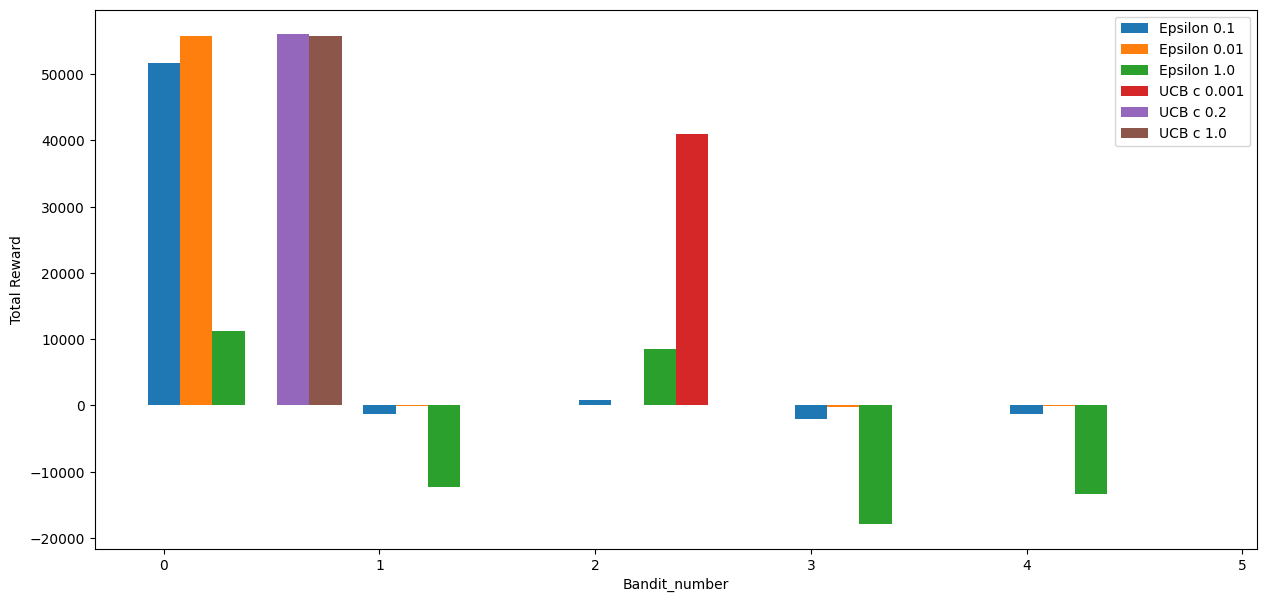

In [76]:
final_rewards = np.zeros((len(total_reward), bandit_amount))

for i in range(len(total_reward)): 
    final_rewards[i] = np.sum(total_reward[i], axis=1) 
    

# axes[0].bar(np.arange(bandit_amount),total_reward[0])
plt.figure(figsize=(15, 7))
for i in range(len(total_reward)):
    if i < len(epsilon):
        label = f"Epsilon {epsilon[i]}"
    else:
        label = f"UCB c {c_value[i - len(epsilon)]}"
    plt.bar(np.arange(bandit_amount) + i * 0.15, final_rewards[i], width=0.15,label=label)
plt.xlabel('Bandit_number')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

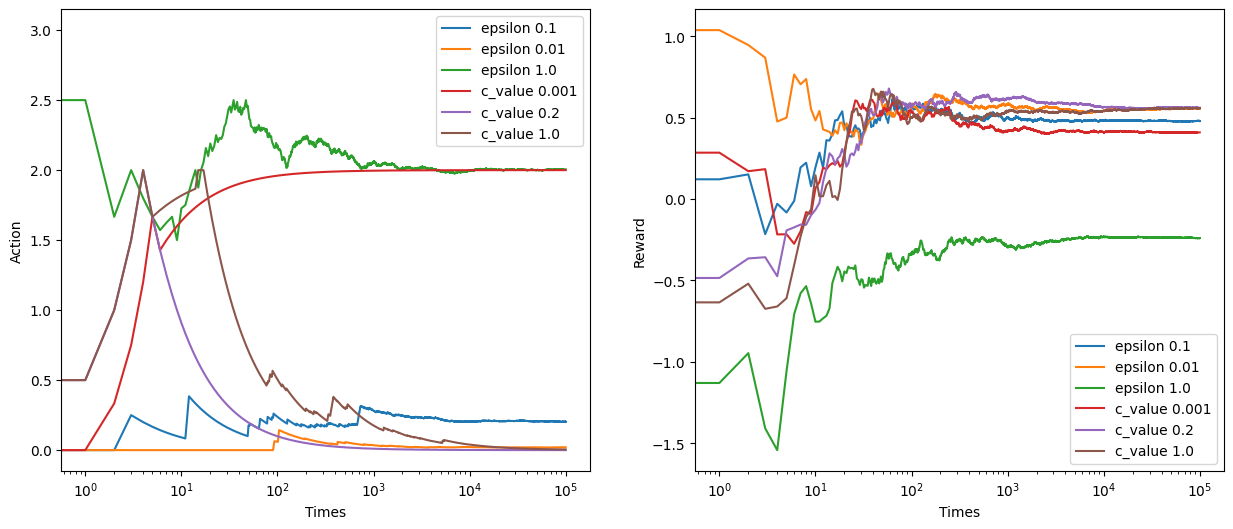

In [77]:
fig, axes = plt.subplots(1, 2,figsize=(15, 6)) 
for i in range(len(epsilon)):
    axes[0].plot(cumulative_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[0].plot(cumulative_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[0].set_xlabel('Times')
axes[0].set_ylabel('Action')
axes[0].set_xscale('log')
axes[0].legend()
for i in range(len(epsilon)):
    axes[1].plot(cumulative_reward_avg[i], label=f'epsilon {epsilon[i]}')
for i in range(len(c_value)):
    axes[1].plot(cumulative_reward_avg[len(epsilon)+i], label=f'c_value {c_value[i]}')
axes[1].set_xlabel('Times')
axes[1].set_ylabel('Reward')
axes[1].set_xscale('log')
axes[1].legend()
plt.show()

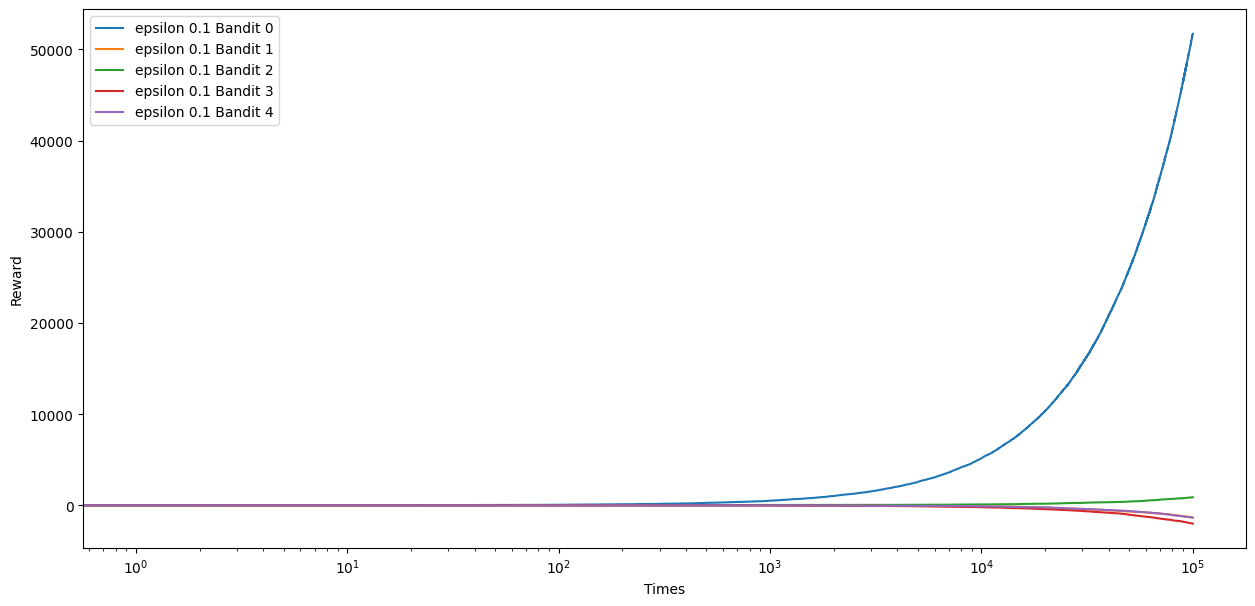

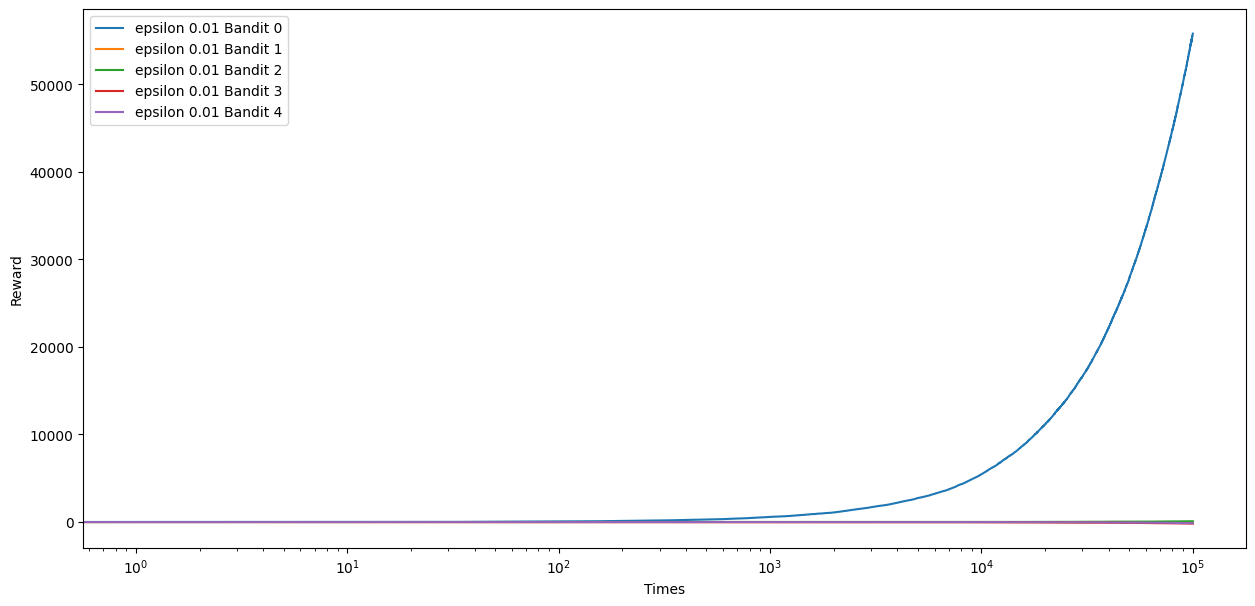

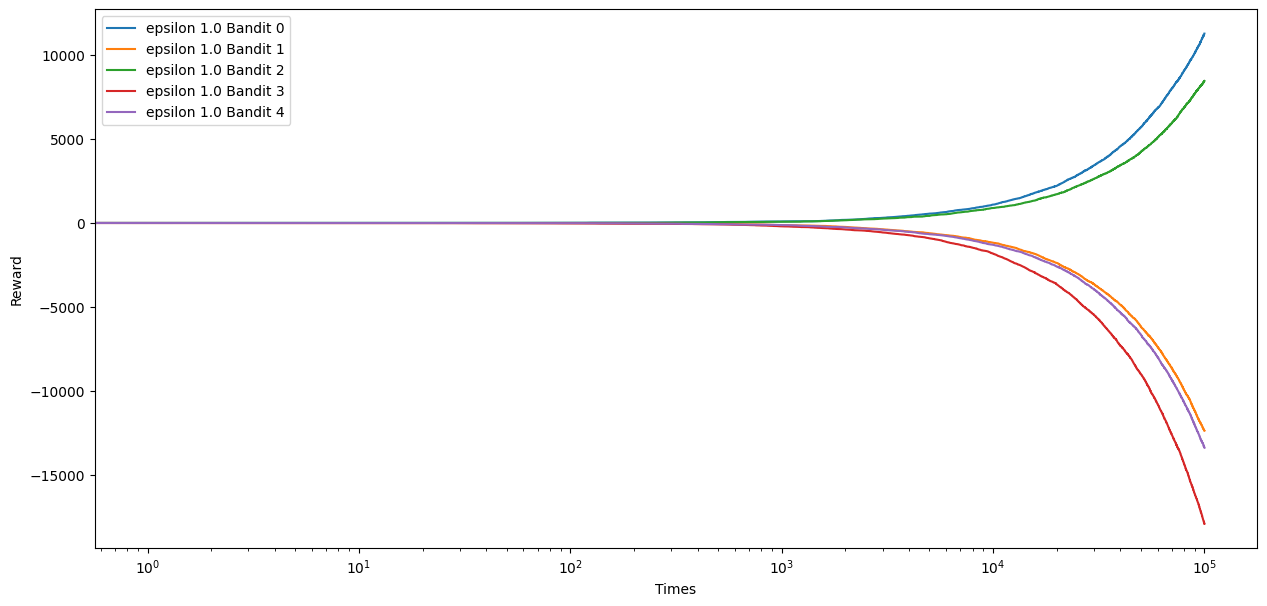

In [78]:
for i in range(len(epsilon)):
    plt.figure(figsize=(15, 7))
    for bandit in range(bandit_amount):
        # plt.plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]) / (np.arange(n_time) + 1), label=f'epsilon {epsilon[i]} Bandit {bandit}')
        plt.plot(np.arange(n_time), np.cumsum(total_reward[i][bandit]) , label=f'epsilon {epsilon[i]} Bandit {bandit}')
    plt.xlabel('Times')
    plt.ylabel('Reward')
    plt.xscale('log')
    plt.legend()
    plt.show()

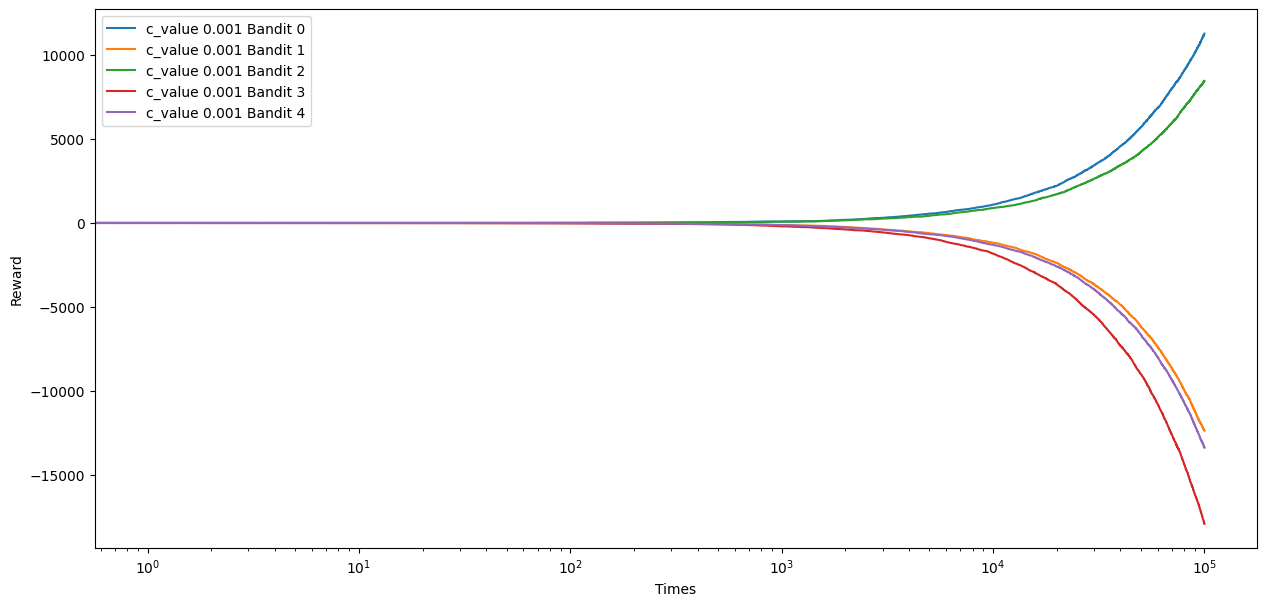

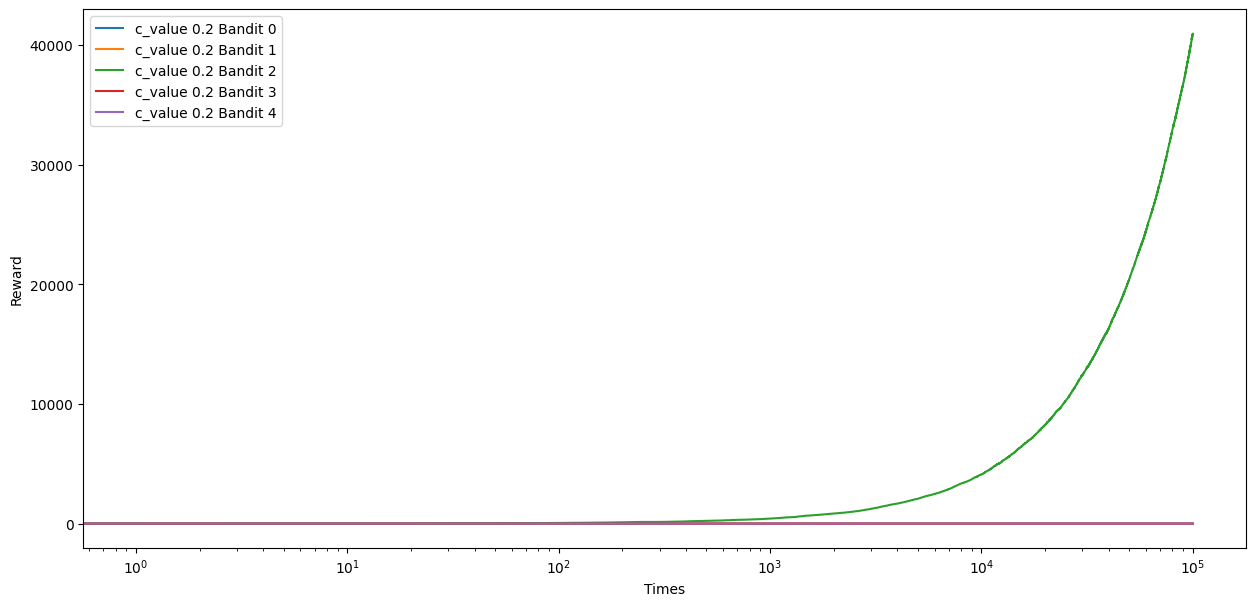

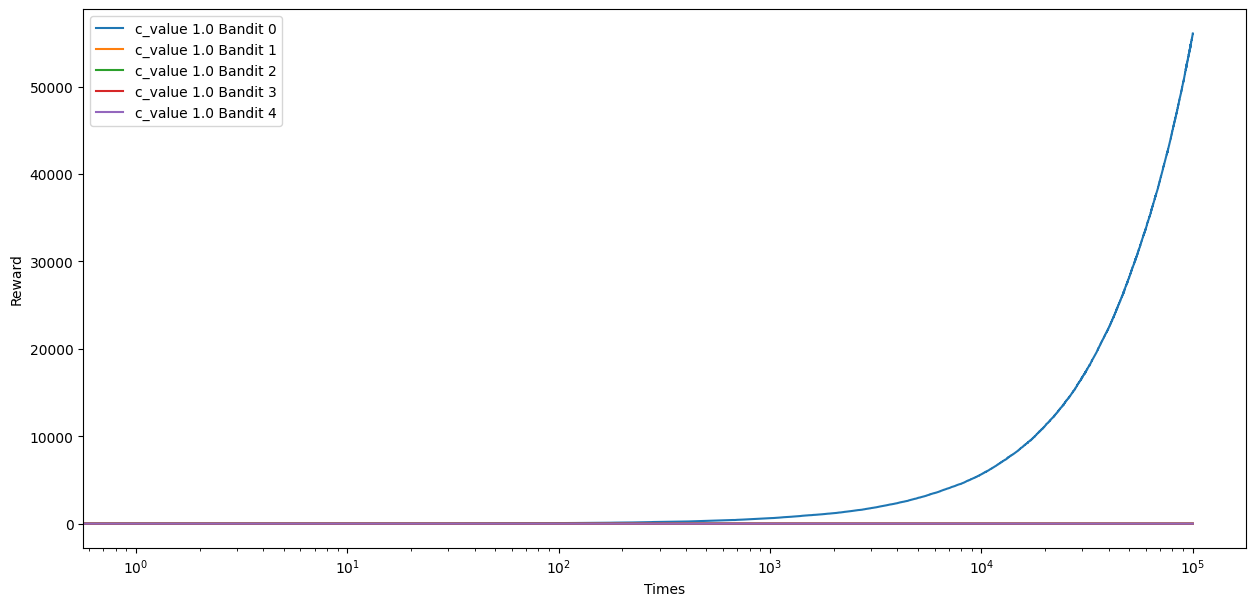

In [79]:
for i in range(len(c_value)):
    plt.figure(figsize=(15, 7))
    for bandit in range(bandit_amount):
        # plt.plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon)-1+i][bandit]) / (np.arange(n_time) + 1), label=f'c_value {c_value[i]} Bandit {bandit}')
        plt.plot(np.arange(n_time), np.cumsum(total_reward[len(epsilon)-1+i][bandit]) , label=f'c_value {c_value[i]} Bandit {bandit}')
    plt.xlabel('Times')
    plt.ylabel('Reward')
    plt.xscale('log')
    plt.legend()
    plt.show()